# Analyze the results of various anomaly detectors

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict

## Read the data

In [2]:
__RESULTS_DIR = '../large_results'
individual_algorithm_results = []
for sub_dir_name in os.listdir(__RESULTS_DIR):
    if sub_dir_name == 'TSB_UAD':
        continue
    algorithm_results = pd.read_csv(f'{__RESULTS_DIR}/{sub_dir_name}/results.csv')
    algorithm_results['Raw anomaly Detector'] = sub_dir_name
    algorithm_results['Anomaly Detector'] = algorithm_results['Raw anomaly Detector'].map(lambda x: x.split('_')[0])
    algorithm_results['Window size'] = algorithm_results['Raw anomaly Detector'].map(lambda x: int(x.split('_')[1]))
    individual_algorithm_results.append(algorithm_results)
results = pd.concat(individual_algorithm_results, axis=0)
results.head()

,collection_name,dataset_name,Seed,affiliation_f1,affiliation_f1_gt_contamination,roc_vus,pr_vus,fbeta,fbeta_05,fbeta_2,Time fit (s),Time predict (s),Peak memory fit (KiB),Peak memory predict (KiB),Raw anomaly Detector,Anomaly Detector,Window size
0,Demo,Demo1,0.0,0.977169,1.000000,0.999480,0.993324,0.494624,0.379538,0.709877,0.63076,0.03295,2643.83105,1984.35645,IForest_128,IForest,128
1,Demo,Demo2,0.0,0.581042,0.903315,0.964779,0.584362,0.321678,0.228628,0.542453,0.70619,0.06641,4134.95605,3536.75781,IForest_128,IForest,128
2,Demo,Demo3,0.0,0.962360,0.657356,0.983325,0.853912,0.647215,0.556062,0.774112,0.73945,0.05363,4109.13770,3536.75781,IForest_128,IForest,128
3,Demo,Demo4,0.0,0.643265,0.656801,0.969735,0.803280,0.594595,0.536823,0.666300,0.75736,0.11368,4134.75684,3536.75781,IForest_128,IForest,128
4,Dodgers,101-freeway-traffic,0.0,0.613770,0.617117,0.822383,0.615622,0.342471,0.353872,0.331781,2.11579,2.11315,78363.93750,77440.79688,IForest_128,IForest,128


In [3]:
results['Total time (s)'] = results['Time fit (s)'] + results['Time predict (s)']
results['Peak memory (KiB)'] = results[['Peak memory fit (KiB)', 'Peak memory predict (KiB)']].max(axis=1)
results.head()

,collection_name,dataset_name,Seed,affiliation_f1,affiliation_f1_gt_contamination,roc_vus,pr_vus,fbeta,fbeta_05,fbeta_2,Time fit (s),Time predict (s),Peak memory fit (KiB),Peak memory predict (KiB),Raw anomaly Detector,Anomaly Detector,Window size,Total time (s),Peak memory (KiB)
0,Demo,Demo1,0.0,0.977169,1.000000,0.999480,0.993324,0.494624,0.379538,0.709877,0.63076,0.03295,2643.83105,1984.35645,IForest_128,IForest,128,0.66371,2643.83105
1,Demo,Demo2,0.0,0.581042,0.903315,0.964779,0.584362,0.321678,0.228628,0.542453,0.70619,0.06641,4134.95605,3536.75781,IForest_128,IForest,128,0.77260,4134.95605
2,Demo,Demo3,0.0,0.962360,0.657356,0.983325,0.853912,0.647215,0.556062,0.774112,0.73945,0.05363,4109.13770,3536.75781,IForest_128,IForest,128,0.79308,4109.13770
3,Demo,Demo4,0.0,0.643265,0.656801,0.969735,0.803280,0.594595,0.536823,0.666300,0.75736,0.11368,4134.75684,3536.75781,IForest_128,IForest,128,0.87104,4134.75684
4,Dodgers,101-freeway-traffic,0.0,0.613770,0.617117,0.822383,0.615622,0.342471,0.353872,0.331781,2.11579,2.11315,78363.93750,77440.79688,IForest_128,IForest,128,4.22894,78363.93750


## Visualize the results

In [4]:
def show_boxplot(
        df: pd.DataFrame, 
        x_value: str, 
        values_of_interest: List[str], 
        type_of_plot: str = 'boxplot',
        rename_x_values: Dict[str, str] = None,
        rename_values_of_interest: Dict[str, str] = None,
        title: str = None,
        y_label: str = None,
        y_log_scale: bool = False):
    
    # Format the data
    df_melted = df[[x_value] + values_of_interest].melt(id_vars=x_value, var_name='Measure', value_name='Score')
    if rename_x_values:
        df_melted[x_value] = df_melted[x_value].replace(rename_x_values)
    if rename_values_of_interest:
        df_melted['Measure'] = df_melted['Measure'].replace(rename_values_of_interest)
        
    # Plot the data
    plt.figure(figsize=(20, 4))
    if type_of_plot == 'boxplot':
        ax = sns.boxplot(data=df_melted, x=x_value, y='Score', hue='Measure')
    elif type_of_plot == 'bar':
        ax = sns.barplot(data=df_melted, x=x_value, y='Score', hue='Measure')
    else:
        raise ValueError(f"Invalid type of plot given: '{type_of_plot}'! Only 'boxplot' and 'bar' are allowed!")
    
    # Format the axis
    ax.legend_.set_title('')
    ax.set_title(title)
    ax.set_ylabel(y_label)
    if y_log_scale:
        ax.semilogy()
        ax.set_title(title + ' (log scale)')
        
    return ax

### The results for each anomaly detector setting

<Axes: title={'center': 'Affiliation F1 metric'}, xlabel='Raw anomaly Detector'>

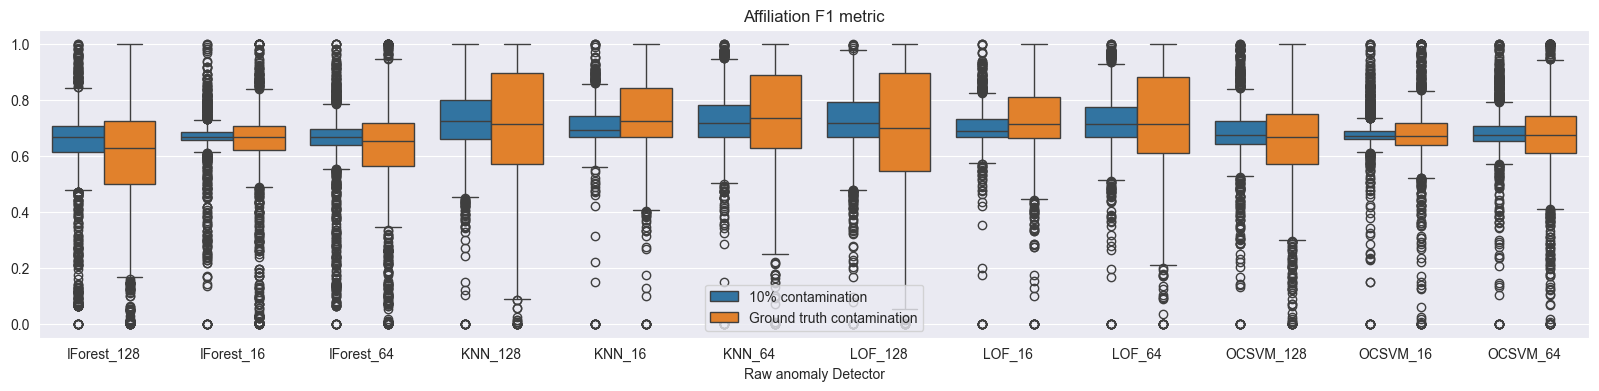

In [5]:
show_boxplot(
    df=results,
    x_value='Raw anomaly Detector',
    values_of_interest=['affiliation_f1', 'affiliation_f1_gt_contamination'],
    rename_values_of_interest={
        'affiliation_f1': '10% contamination',
        'affiliation_f1_gt_contamination': 'Ground truth contamination'
    },
    title='Affiliation F1 metric'
)

<Axes: title={'center': 'Volume Under Surface metrics'}, xlabel='Raw anomaly Detector'>

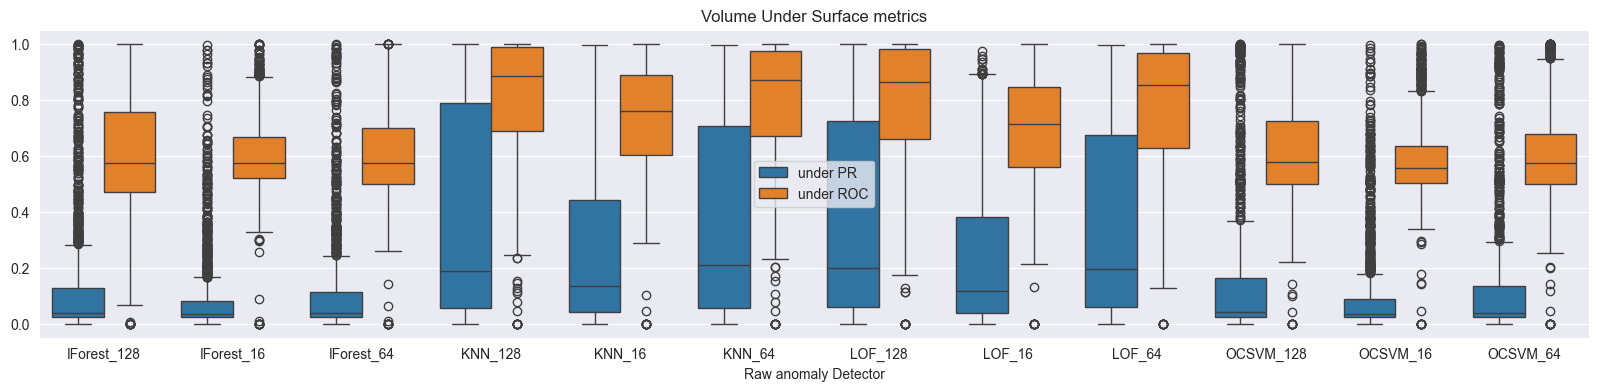

In [6]:
show_boxplot(
    df=results,
    x_value='Raw anomaly Detector',
    values_of_interest=['pr_vus', 'roc_vus'],
    rename_values_of_interest={
        'pr_vus': 'under PR',
        'roc_vus': 'under ROC'
    },
    title='Volume Under Surface metrics'
)

<Axes: title={'center': 'F$\\beta$ metrics'}, xlabel='Raw anomaly Detector'>

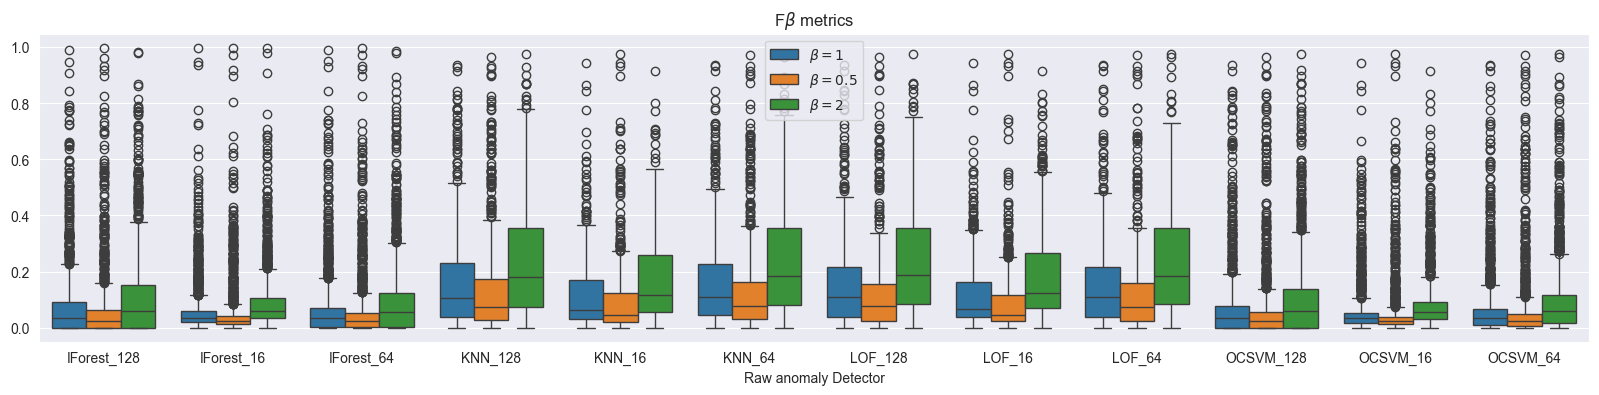

In [7]:
show_boxplot(
    df=results,
    x_value='Raw anomaly Detector',
    values_of_interest=['fbeta', 'fbeta_05', 'fbeta_2'],
    rename_values_of_interest={
        'fbeta': r'$\beta = 1$',
        'fbeta_05': r'$\beta = 0.5$',
        'fbeta_2': r'$\beta = 2$',
    },
    title=r'F$\beta$ metrics'
)

<Axes: title={'center': 'Running time (log scale)'}, xlabel='Raw anomaly Detector', ylabel='Time (s)'>

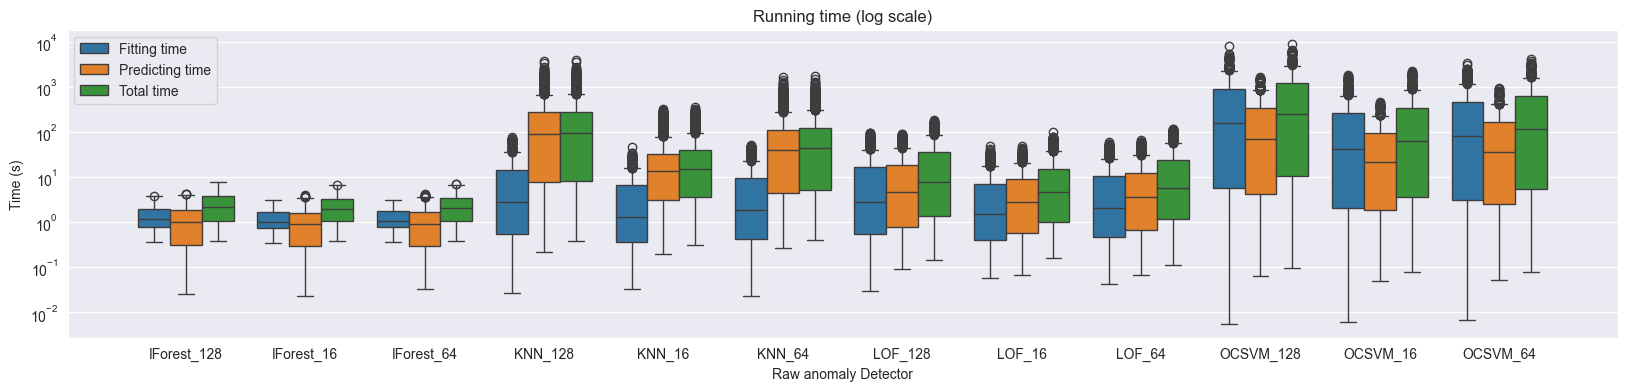

In [8]:
show_boxplot(
    df=results,
    x_value='Raw anomaly Detector',
    values_of_interest=['Time fit (s)', 'Time predict (s)', 'Total time (s)'],
    rename_values_of_interest={
        'Time fit (s)': 'Fitting time',
        'Time predict (s)': 'Predicting time',
        'Total time (s)': 'Total time',
    },
    title='Running time',
    y_label='Time (s)',
    y_log_scale=True
)

<Axes: title={'center': 'Peak memory usage (log scale)'}, xlabel='Raw anomaly Detector', ylabel='Memory usage (KiB)'>

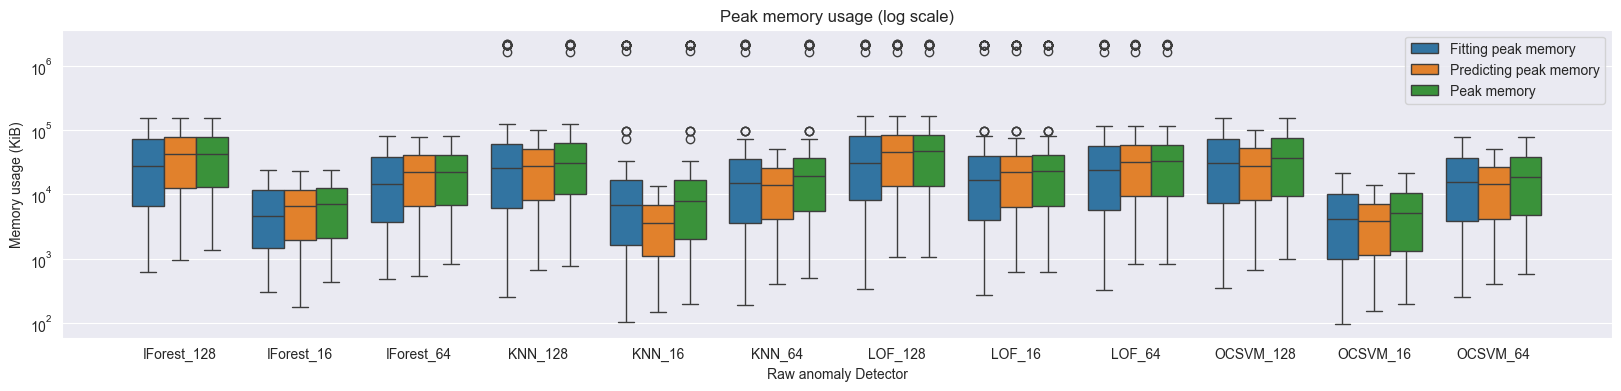

In [9]:
show_boxplot(
    df=results,
    x_value='Raw anomaly Detector',
    values_of_interest=['Peak memory fit (KiB)', 'Peak memory predict (KiB)', 'Peak memory (KiB)'],
    rename_values_of_interest={
        'Peak memory fit (KiB)': 'Fitting peak memory',
        'Peak memory predict (KiB)': 'Predicting peak memory',
        'Peak memory (KiB)': 'Peak memory',
    },
    title='Peak memory usage',
    y_label='Memory usage (KiB)',
    y_log_scale=True
)

### Aggregated results 

<Axes: title={'center': 'Volume Under Surface metrics'}, xlabel='Anomaly Detector'>

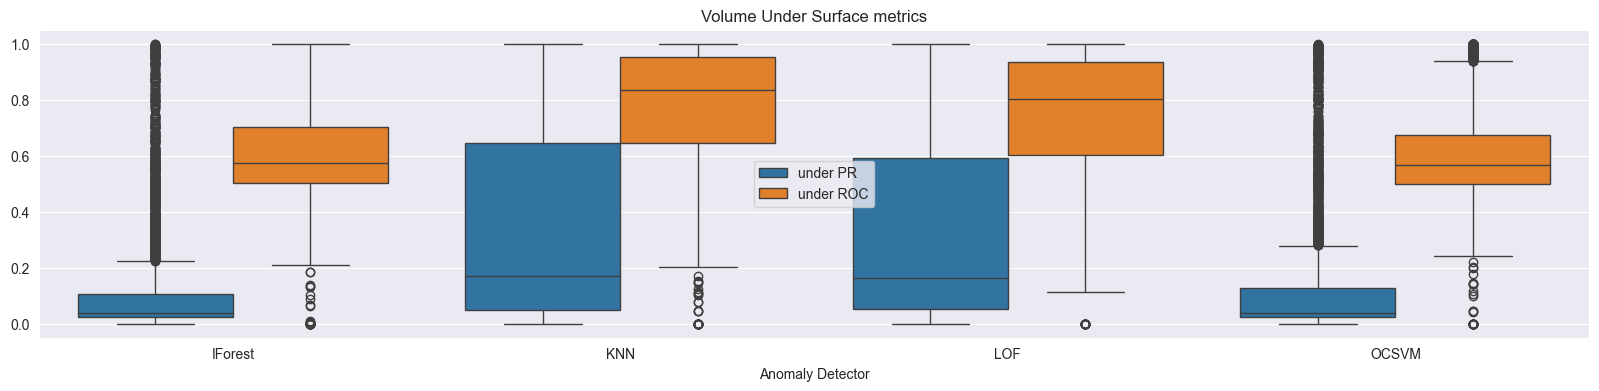

In [10]:
show_boxplot(
    df=results,
    x_value='Anomaly Detector',
    values_of_interest=['pr_vus', 'roc_vus'],
    rename_values_of_interest={
        'pr_vus': 'under PR',
        'roc_vus': 'under ROC'
    },
    title='Volume Under Surface metrics'
)

<Axes: title={'center': 'Volume Under Surface metrics'}, xlabel='Window size'>

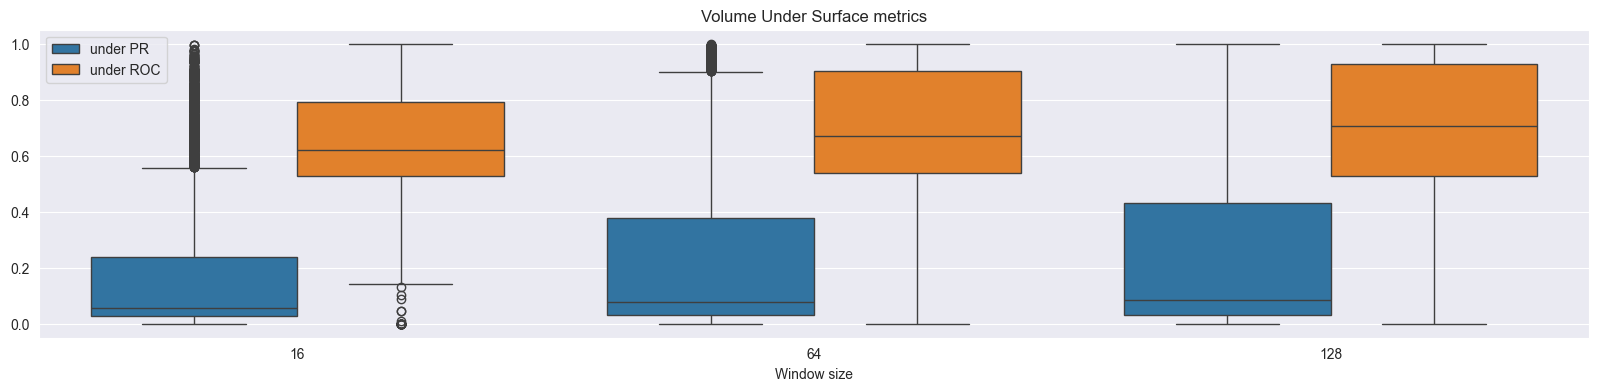

In [11]:
show_boxplot(
    df=results,
    x_value='Window size',
    values_of_interest=['pr_vus', 'roc_vus'],
    rename_values_of_interest={
        'pr_vus': 'under PR',
        'roc_vus': 'under ROC'
    },
    title='Volume Under Surface metrics'
)

<Axes: title={'center': 'Running time (log scale)'}, xlabel='Anomaly Detector', ylabel='Time (s)'>

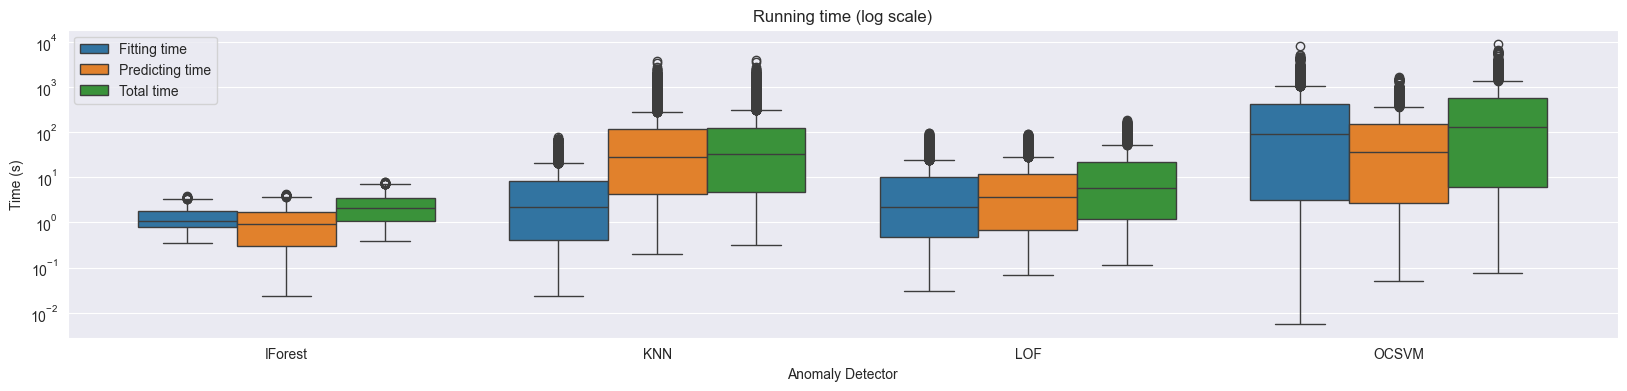

In [12]:
show_boxplot(
    df=results,
    x_value='Anomaly Detector',
    values_of_interest=['Time fit (s)', 'Time predict (s)', 'Total time (s)'],
    rename_values_of_interest={
        'Time fit (s)': 'Fitting time',
        'Time predict (s)': 'Predicting time',
        'Total time (s)': 'Total time',
    },
    title='Running time',
    y_label='Time (s)',
    y_log_scale=True
)

### Quantification of benchmark difficulty

<Axes: title={'center': 'Volume Under Surface metrics'}, xlabel='Collection name'>

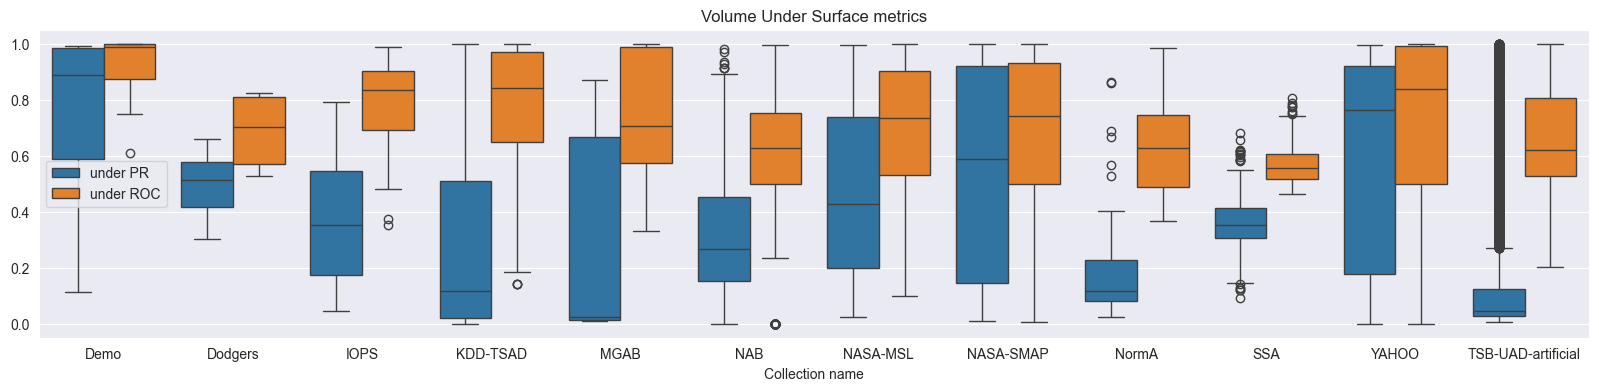

In [13]:
show_boxplot(
    df=results.rename(columns={'collection_name': 'Collection name'}),
    x_value='Collection name',
    values_of_interest=['pr_vus', 'roc_vus'],
    rename_values_of_interest={
        'pr_vus': 'under PR',
        'roc_vus': 'under ROC'
    },
    title='Volume Under Surface metrics'
)